In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 90% 147M/163M [00:00<00:00, 218MB/s]
100% 163M/163M [00:00<00:00, 232MB/s]


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.utils import plot_model

In [ ]:

from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()

The dataset is extracted


In [ ]:
with_mask_data = os.listdir(r'/content/data/with_mask')

In [ ]:
print('Number of with mask images:', len(with_mask_data))

Number of with mask images: 3725


In [ ]:
without_mask_data = os.listdir(r'/content/data/without_mask')

In [ ]:
print(without_mask_data[0:5])

['without_mask_2292.jpg', 'without_mask_1562.jpg', 'without_mask_3169.jpg', 'without_mask_247.jpg', 'without_mask_1078.jpg']


In [ ]:
print('Number of without mask images:', len(without_mask_data))

Number of without mask images: 3828


In [ ]:
with_mask_labels = [1]*len(with_mask_data)
print(f"With Mask labels" ,with_mask_labels[0:10])

without_mask_labels = [0]*len(without_mask_data)
print(f"Without Mask Labels", without_mask_labels[0:10])

With Mask labels [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Without Mask Labels [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
Labels = with_mask_labels + without_mask_labels
print(f"Labels", Labels[0:10])
print(f"Labels", Labels[-10:])

Labels [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Labels [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


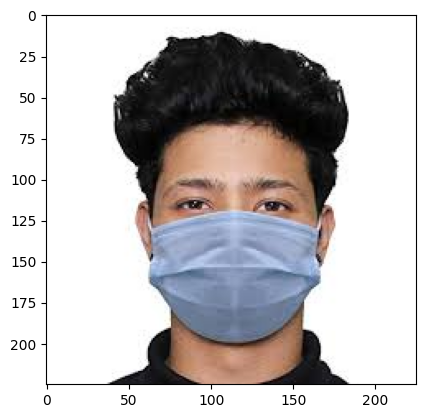

In [ ]:
import random
random_image = random.choice(with_mask_data)
img = Image.open('/content/data/with_mask' + '/' + random_image)
plt.imshow(img)


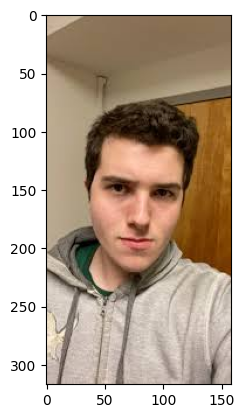

In [ ]:
import random
random_image = random.choice(without_mask_data)
img = Image.open(r'/content/data/without_mask' + '/' + random_image)
plt.imshow(img)

In [ ]:
images = []
def load_images_from_folder(folder):

    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder,filename))
        img = img.resize((128,128))
        img = img.convert('RGB')
        images.append(np.array(img))
    return images

with_mask_images = load_images_from_folder(r'/content/data/with_mask')
without_mask_images = load_images_from_folder(r'/content/data/without_mask')

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
X = np.array(images)
Y = np.array(Labels)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {Y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {Y_test.shape}")

Shape of X_train is: (6042, 128, 128, 3)
Shape of Y_train is: (6042,)

Shape of X_test is: (1511, 128, 128, 3)
Shape of Y_test is: (1511,)


In [ ]:
#scaling the data
X_train = X_train/255
X_test = X_test/255

In [ ]:
from tensorflow.keras.applications import ResNet152V2


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten ,Dense ,Dropout ,BatchNormalization
from tensorflow.keras.optimizers import Adamax

image_size = (128,128)
channels = 3
image_shape = (image_size[0],image_size[1], channels)


base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=image_shape)

model = Sequential([
    base_model,
    Flatten(),
    BatchNormalization(),
    Dense(256, activation ='relu'),
    Dropout(rate=0.2),

    Dense(2, activation ='sigmoid')

])

234545216/234545216 [==============================] - 1s 0us/step


In [ ]:
model.compile(Adamax(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 4, 4, 2048)        58331648  
                                                                 
 flatten_8 (Flatten)         (None, 32768)             0         
                                                                 
 batch_normalization_8 (Bat  (None, 32768)             131072    
 chNormalization)                                                
                                                                 
 dense_16 (Dense)            (None, 256)               8388864   
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 2)                 514       
                                                      

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, validation_split=0.1)

Epoch 1/10
170/170 [==============================] - 339s 2s/step - loss: 0.2299 - accuracy: 0.9279 - val_loss: 0.2888 - val_accuracy: 0.9653
Epoch 2/10
170/170 [==============================] - 296s 2s/step - loss: 0.0717 - accuracy: 0.9779 - val_loss: 0.0499 - val_accuracy: 0.9884
Epoch 3/10
170/170 [==============================] - 294s 2s/step - loss: 0.0208 - accuracy: 0.9914 - val_loss: 0.0205 - val_accuracy: 0.9917
Epoch 4/10
170/170 [==============================] - 294s 2s/step - loss: 0.0476 - accuracy: 0.9855 - val_loss: 0.0649 - val_accuracy: 0.9835
Epoch 5/10
163/170 [===========================>..] - ETA: 11s - loss: 0.0188 - accuracy: 0.9942

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 7s 146ms/step - loss: 0.0828 - accuracy: 0.9801
Test Accuracy = 0.9801455736160278


In [ ]:
#Classification Report
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(Y_test, y_pred))

48/48 [==============================] - 7s 95ms/step
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       750
           1       0.99      0.73      0.84       761

    accuracy                           0.86      1511
   macro avg       0.89      0.86      0.86      1511
weighted avg       0.89      0.86      0.86      1511



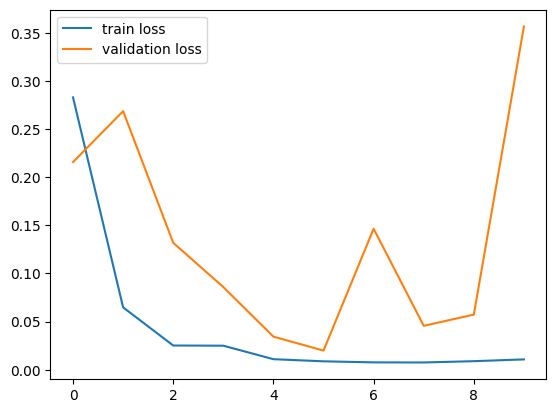

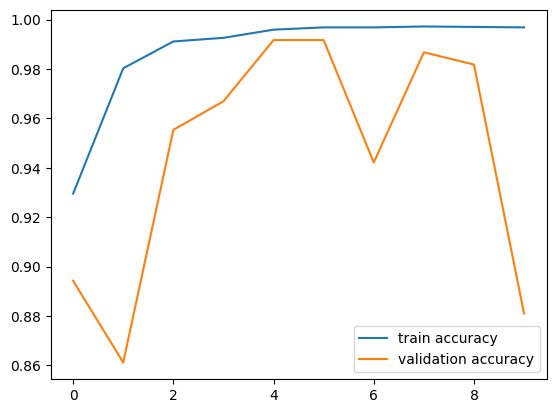

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

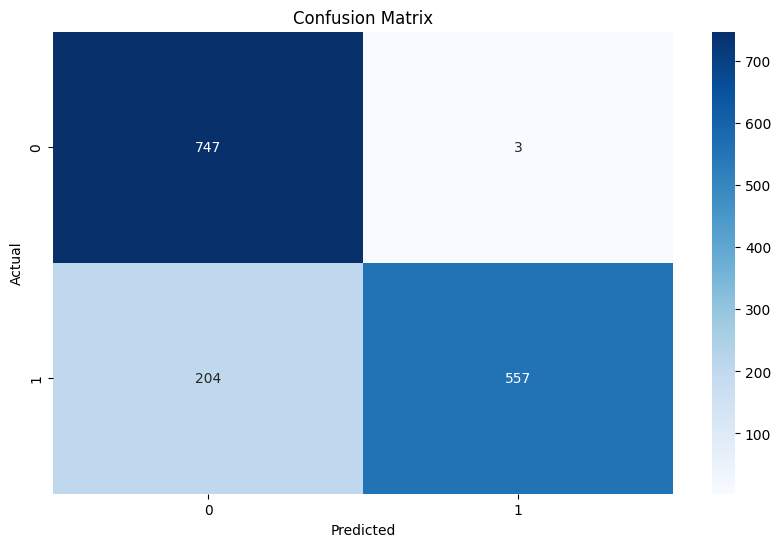

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)
#plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from google.colab.patches import cv2_imshow

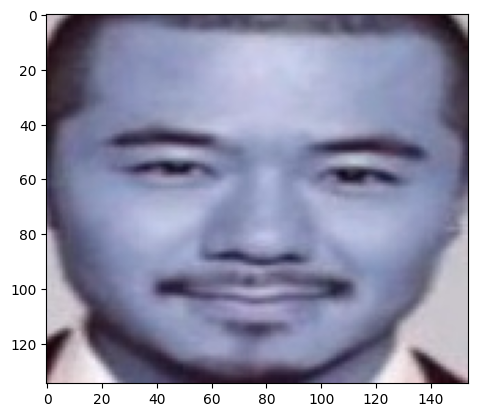

1/1 [==============================] - 0s 63ms/step
[[0.9955567  0.02186985]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = '/content/data/without_mask/without_mask_10.jpg'

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)
plt.show()

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')